In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress
from scipy.signal import savgol_filter

In [2]:
def csv_import(xlsxname):
    df = pd.read_csv(xlsxname, 
                     encoding = 'unicode_escape', 
                     delimiter=";", 
                     decimal=',', 
                     skiprows=1, 
                     names=['time', 'N', 'mm'])
    df['N'] = -df['N']
    df['mm'] = -df['mm']
    df['time'] = pd.to_datetime(df['time'])
    #df['timed'] = df['time']-df['time'].iloc[0]
    #df['times']=df['timed'].dt.total_seconds()
    return df

In [3]:
def cut_end(tempdf, end):
    tempdf = tempdf.loc[:end,:]
    return tempdf

In [4]:
def plot_mm_time_N(df):
    fig = plt.figure(figsize=(10, 5))
    gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
    (ax1, ax2) = gs.subplots(sharey='row')
    ax1.plot(df['time'], df['N'])
    ax2.plot(df['mm'], df['N'])
    ax1.set_xlabel('время')
    ax2.set_xlabel('перемещение, mm')
    ax1.set_ylabel('Усилие, N')
    ax1.grid(True)
    ax2.grid(True)
    ax1.set_ylim(0,)
    fig.tight_layout()
    plt.show()

In [5]:
def easy_import(filename, idx=0):
    tempdf = xls_import(filename)
    tempdf = tempdf.loc[:tempdf['N'].idxmax(),:]
    tempdf = tempdf.loc[idx:,:]
    idmin1 = tempdf['N'].searchsorted(100, side='right')
    idmin2 = tempdf['N'].searchsorted(400, side='right')
    idmin3 = tempdf['N'].searchsorted(1000, side='right')
    print('~100N: {:>5}, ~400N:{:>5}, 1000N~{:>5}'.format(idmin1, idmin2, idmin3))
    print(tempdf.head(5))
    plot_mm_time_N(tempdf)
    return tempdf

In [6]:
def easy_import2(filename, idx=0):
    tempdf = xls_import(filename)
    tempdf = tempdf.loc[idx:,:]
    idmin1 = tempdf['N'].searchsorted(100, side='right')
    idmin2 = tempdf['N'].searchsorted(400, side='right')
    idmin3 = tempdf['N'].searchsorted(1000, side='right')
    print('~100N: {:>5}, ~400N:{:>5}, 1000N~{:>5}'.format(idmin1, idmin2, idmin3))
    print(tempdf.head(5))
    plot_mm_time_N(tempdf)
    return tempdf

In [7]:
def dfalign(df,minn,maxn):
    slope, intercept, r_value, p_value, std_err = linregress(df['mm_f'][minn:maxn], df['N_f'][minn:maxn])
    print(slope)
    xi = intercept/slope
    maxN = df['N_f'].max()
    x1=df['mm_f'].mean()
    y1=df['N_f'][minn:maxn].mean()
    df['mm_f']+=xi
    df['mm']+=xi
    df['dx']=df['mm_f']-df['N_f']/slope
    fig = plt.figure(figsize=(13, 4))
    xax2=maxN/(4*slope)
    xax3=maxN/slope
    gs = fig.add_gridspec(1, 4, hspace=0, wspace=0)
    (ax1, ax2, ax3, ax4) = gs.subplots(sharey='row')
    ax1.plot(df['mm_f'], df['N_f'])
    ax1.plot(df['mm'], df['N'])
    ax2.plot(df['mm_f'], df['N_f'])
    ax2.text(maxN/(2*slope), y1, 'k={:.0f}'.format(slope))
    ax2.text(xax2, df['N_f'].loc[maxn], '{:.0f}'.format(df['N_f'].loc[maxn]))
    ax2.text(xax2, df['N_f'].loc[minn], '{:.0f}'.format(df['N_f'].loc[minn]))
    ax2.plot([0,xax3], [df['N_f'].loc[maxn], df['N_f'].loc[maxn]], linestyle='dotted', color='green')
    ax2.plot([0,xax3], [df['N_f'].loc[maxn], df['N_f'].loc[maxn]], linestyle='dotted', color='red')
    ax2.plot([0,xax3], [df['N_f'].loc[minn], df['N_f'].loc[minn]], linestyle='dotted', color='blue')
    ax3.plot(df['dx'], df['N_f'])
    ax2.plot([0,maxN/slope],[0,maxN], linestyle='dotted') 
    ax1.plot([0,maxN/slope],[0,maxN], linestyle='dotted')
    ax4.plot(df['dx'], df['N_f'])
    ax1.set_xlabel('перемещение, мм')
    ax2.set_xlabel('перемещение, мм')
    ax3.set_xlabel('перемещение без упругой, мм')
    ax4.set_xlabel('перемещение без упругой, мм')
    ax1.set_ylabel('Усилие, N')
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    ax4.grid(True)
    ax1.set_xlim(0,x1)
    ax2.set_ylim(0,)
    ax3.set_xlim(-0.05,0.05)
    ax2.set_xlim(0,xax3)
    fig.tight_layout()
    plt.show()

In [8]:
df13_1 = csv_import('./ek79/ЭК79#13-1.csv')

[]

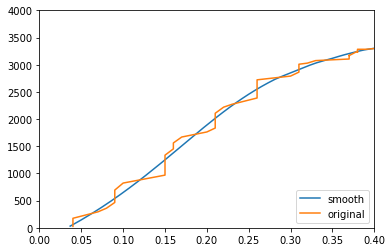

In [9]:
df13_1['N_f'] = savgol_filter(df13_1['N'], 55, 5)
df13_1['mm_f'] = savgol_filter(df13_1['mm'], 55, 5)
plt.plot(df13_1['mm_f'], df13_1['N_f'], label='smooth')
plt.plot(df13_1['mm'], df13_1['N'], label='original')
plt.xlim(0,0.4)
plt.ylim(0,4000)
plt.legend(loc='lower right')
plt.plot()

12795.792021942347


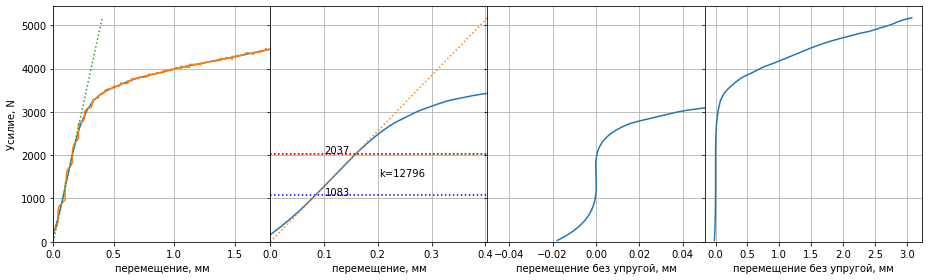

In [10]:
dfalign(df13_1,9,18)

(0.0, 129.81028910918388)

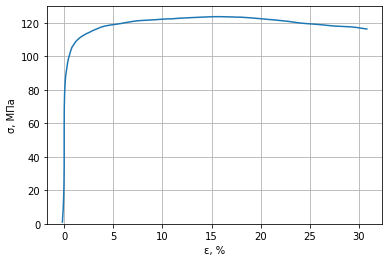

In [11]:
sp13_1={}
sp13_1['h0'] = 10.0
sp13_1['d0'] = 6.26
df13_1['h'] = (sp13_1['h0']-df13_1['dx'])
df13_1['area'] = math.pi*0.25*sp13_1['d0']*sp13_1['d0']*sp13_1['h0']/df13_1['h']
df13_1['σ'] = df13_1['N_f']/df13_1['area']
df13_1['ε'] = 100*df13_1['dx']/sp13_1['h0']
plt.plot(df13_1['ε'], df13_1['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.grid()
plt.ylim(0,)

In [12]:
df13_2 = csv_import('./ek79/ЭК79#13-2.csv')
df13_2.head()

,time,N,mm
0,2022-01-17 10:37:22,79,0.78
1,2022-01-17 10:37:22,86,0.78
2,2022-01-17 10:37:22,105,0.81
3,2022-01-17 10:37:22,162,0.80
4,2022-01-17 10:37:23,145,0.80


[]

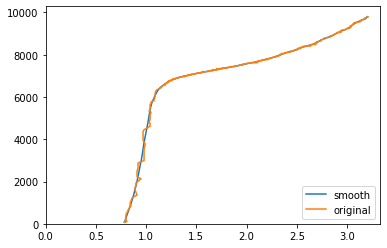

In [13]:
df13_2['N_f'] = savgol_filter(df13_2['N'], 55, 5)
df13_2['mm_f'] = savgol_filter(df13_2['mm'], 55, 5)
plt.plot(df13_2['mm_f'], df13_2['N_f'], label='smooth')
plt.plot(df13_2['mm'], df13_2['N'], label='original')
plt.xlim(0,)
plt.ylim(0,)
plt.legend(loc='lower right')
plt.plot()

26684.436613993


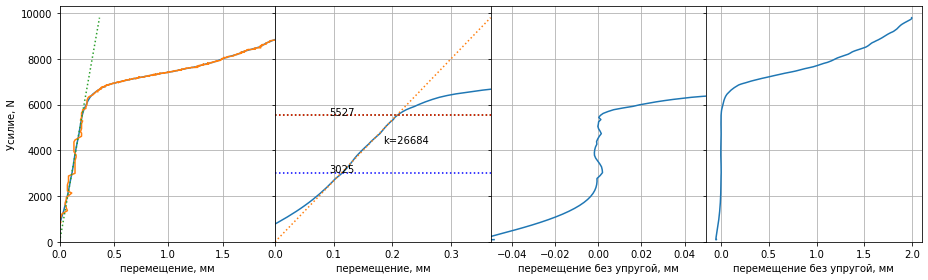

In [14]:
df=dfalign(df13_2,29,51)

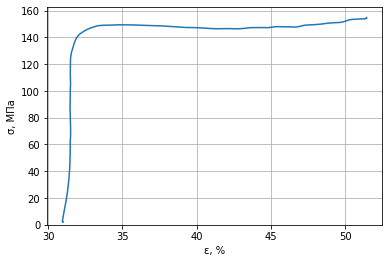

In [15]:
sp13_2={}
sp13_2['h0'] = 6.85
sp13_2['d0'] = 7.56
df13_2['h'] = sp13_2['h0']-df13_2['dx']
df13_2['area'] = math.pi*0.25*sp13_2['d0']*sp13_2['d0']*sp13_2['h0']/df13_2['h']
df13_2['σ'] = df13_2['N_f']/df13_2['area']
df13_2['ε'] = 100*(df13_2['dx']+sp13_1['h0']-sp13_2['h0'])/sp13_1['h0']
plt.plot(df13_2['ε'], df13_2['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [16]:
df13_3 = csv_import('./ek79/ЭК79#13-3.csv')
df13_3.head()

,time,N,mm
0,2022-01-17 10:14:57,79,0.05
1,2022-01-17 10:14:57,129,0.05
2,2022-01-17 10:14:57,234,0.05
3,2022-01-17 10:14:57,367,0.07
4,2022-01-17 10:14:58,535,0.07


[]

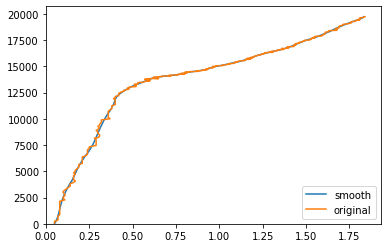

In [17]:
df13_3['N_f'] = savgol_filter(df13_3['N'], 55, 5)
df13_3['mm_f'] = savgol_filter(df13_3['mm'], 55, 5)
plt.plot(df13_3['mm_f'], df13_3['N_f'], label='smooth')
plt.plot(df13_3['mm'], df13_3['N'], label='original')
plt.xlim(0,)
plt.ylim(0,)
plt.legend(loc='lower right')
plt.plot()

30345.607242921604


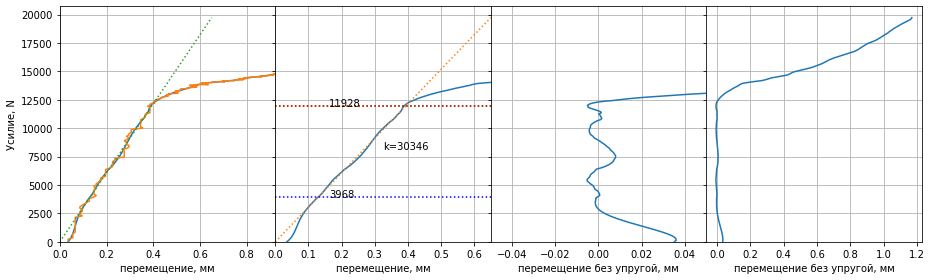

In [18]:
df=dfalign(df13_3,29,96)

(0.0, 64.25994131861454)

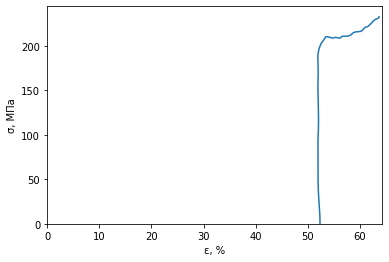

In [19]:
sp13_3={}
sp13_3['h0'] = 4.8
sp13_3['d0'] = 9.04
df13_3['h'] = sp13_3['h0']-df13_3['dx']
df13_3['area'] = math.pi*0.25*sp13_3['d0']*sp13_3['d0']*sp13_3['h0']/df13_3['h']
df13_3['σ'] = df13_3['N_f']/df13_3['area']
df13_3['ε'] = 100*(df13_3['dx']+sp13_1['h0']-sp13_3['h0'])/sp13_1['h0']
plt.plot(df13_3['ε'], df13_3['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.xlim(0,)

(0.0, 66.86624272911757)

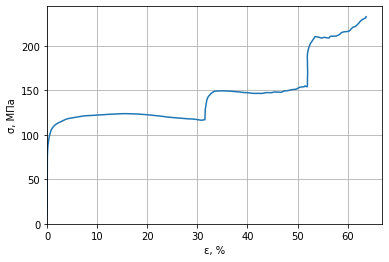

In [20]:
maxN13_1=df13_1['N'].iloc[-1]
df13_2 = df13_2[(df13_2.N>maxN13_1)]
maxN13_2=df13_2['N'].iloc[-1]
df13_3 = df13_3[(df13_3.N>maxN13_2)]
df13=df13_1.append(df13_2,ignore_index=True).append(df13_3,ignore_index=True)
plt.plot(df13['ε'],df13['σ'])
plt.grid()
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.xlim(0,)

In [21]:
df14_1 = csv_import('./ek79/ЭК79#14-1.csv')
df14_1.head()

,time,N,mm
0,2022-01-17 13:17:56,72,0.18
1,2022-01-17 13:17:56,112,0.18
2,2022-01-17 13:17:56,148,0.18
3,2022-01-17 13:17:56,182,0.19
4,2022-01-17 13:17:56,221,0.20


[]

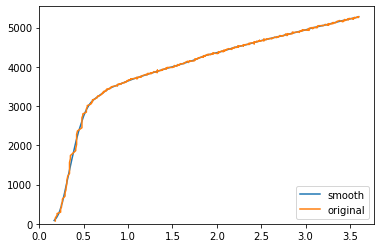

In [22]:
df14_1['N_f'] = savgol_filter(df14_1['N'], 55, 5)
df14_1['mm_f'] = savgol_filter(df14_1['mm'], 55, 5)
plt.plot(df14_1['mm_f'], df14_1['N_f'], label='smooth')
plt.plot(df14_1['mm'], df14_1['N'], label='original')
plt.xlim(0,)
plt.ylim(0,)
plt.legend(loc='lower right')
plt.plot()

10556.347828826185


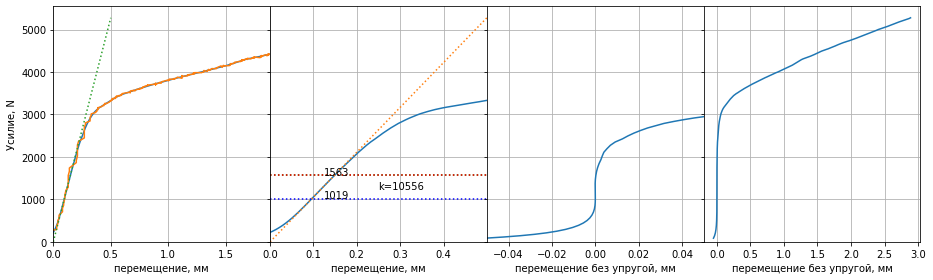

In [23]:
dfalign(df14_1,17,23)

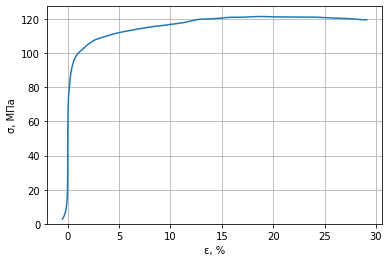

In [24]:
sp14_1={}
sp14_1['h0'] = 9.92
sp14_1['d0'] = 6.31
df14_1['h'] = (sp14_1['h0']-df14_1['dx'])
df14_1['area'] = math.pi*0.25*sp14_1['d0']*sp14_1['d0']*sp14_1['h0']/df14_1['h']
df14_1['σ'] = df14_1['N_f']/df14_1['area']
df14_1['ε'] = 100*df14_1['dx']/sp14_1['h0']
plt.plot(df14_1['ε'], df14_1['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [25]:
df14_2 = csv_import('./ek79/ЭК79#14-2.csv')
df14_2.head()

,time,N,mm
0,2022-01-17 11:00:56,99,0.76
1,2022-01-17 11:00:56,122,0.77
2,2022-01-17 11:00:56,109,0.80
3,2022-01-17 11:00:56,125,0.81
4,2022-01-17 11:00:56,125,0.81


[]

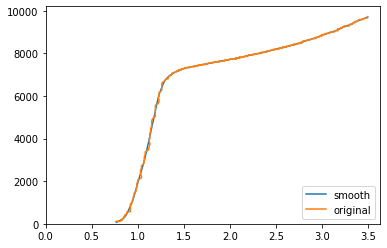

In [26]:
df14_2['N_f'] = savgol_filter(df14_2['N'], 55, 5)
df14_2['mm_f'] = savgol_filter(df14_2['mm'], 55, 5)
plt.plot(df14_2['mm_f'], df14_2['N_f'], label='smooth')
plt.plot(df14_2['mm'], df14_2['N'], label='original')
plt.xlim(0,)
plt.ylim(0,)
plt.legend(loc='lower right')
plt.plot()

19924.97176143895


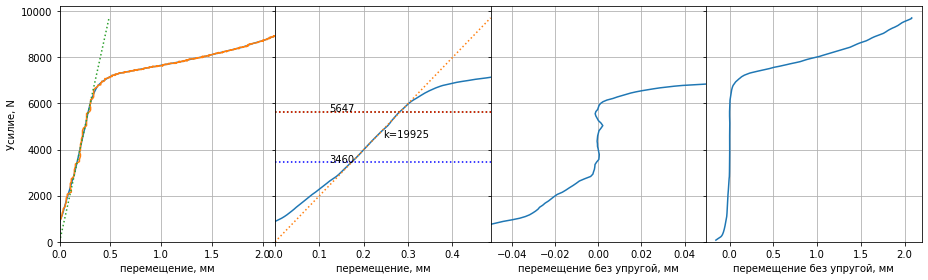

In [27]:
dfalign(df14_2,55,75)

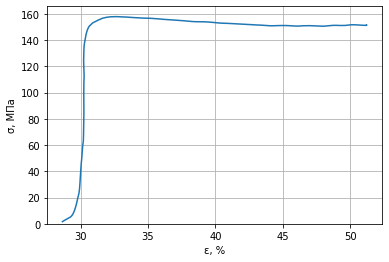

In [28]:
sp14_2={}
sp14_2['h0'] = 6.92
sp14_2['d0'] = 7.55
df14_2['h'] = sp14_2['h0']-df14_2['dx']
df14_2['area'] = math.pi*0.25*sp14_2['d0']*sp14_2['d0']*sp14_2['h0']/df14_2['h']
df14_2['σ'] = df14_2['N_f']/df14_2['area']
df14_2['ε'] = 100*(df14_2['dx']+sp14_1['h0']-sp14_2['h0'])/sp14_1['h0']
plt.plot(df14_2['ε'], df14_2['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [29]:
df14_3 = csv_import('./ek79/ЭК79#14-3.csv')
df14_3.head()

,time,N,mm
0,2022-01-17 10:40:34,96,1.16
1,2022-01-17 10:40:34,125,1.16
2,2022-01-17 10:40:34,115,1.15
3,2022-01-17 10:40:34,132,1.16
4,2022-01-17 10:40:35,119,1.18


[]

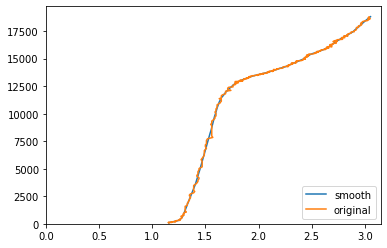

In [30]:
df14_3['N_f'] = savgol_filter(df14_3['N'], 75, 5)
df14_3['mm_f'] = savgol_filter(df14_3['mm'], 75, 5)
plt.plot(df14_3['mm_f'], df14_3['N_f'], label='smooth')
plt.plot(df14_3['mm'], df14_3['N'], label='original')
plt.xlim(0,)
plt.ylim(0,)
plt.legend(loc='lower right')
plt.plot()

34391.264265598984


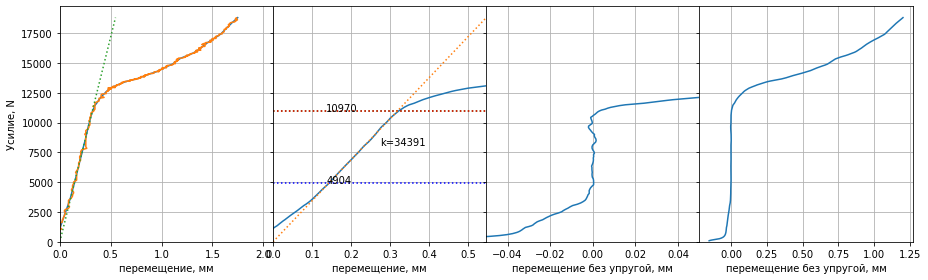

In [31]:
dfalign(df14_3,75,125)

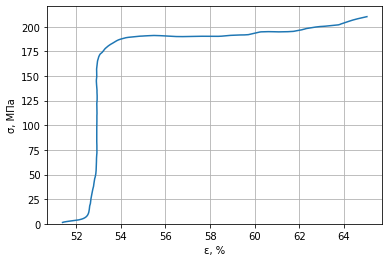

In [32]:
sp14_3={}
sp14_3['h0'] = 4.67
sp14_3['d0'] = 9.2
df14_3['h'] = sp14_3['h0']-df14_3['dx']
df14_3['area'] = math.pi*0.25*sp14_3['d0']*sp14_3['d0']*sp14_3['h0']/df14_3['h']
df14_3['σ'] = df14_3['N_f']/df14_3['area']
df14_3['ε'] = 100*(df14_3['dx']+sp14_1['h0']-sp14_3['h0'])/sp14_1['h0']
plt.plot(df14_3['ε'], df14_3['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

(0.0, 68.30579633799496)

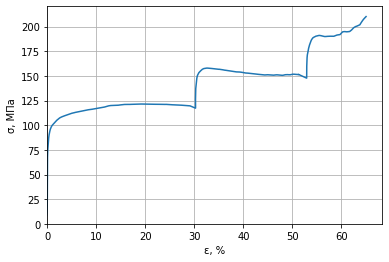

In [33]:
maxN14_1=df14_1['N'].iloc[-1]
df14_2 = df14_2[(df14_2.N>maxN14_1)]
maxN14_2=df14_2['N'].iloc[-1]
df14_3 = df14_3[(df14_3.N>maxN14_2)]
df14=df14_1.append(df14_2,ignore_index=True).append(df14_3,ignore_index=True)
plt.plot(df14['ε'],df14['σ'])
plt.grid()
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.xlim(0,)

In [34]:
#save to excel
with pd.ExcelWriter('ЭК79.xlsx') as writer:
    df13.to_excel(writer, sheet_name='#13', index = False, columns=['time', 'dx', 'h', 'N_f', 'area', 'ε', 'σ'])
    df14.to_excel(writer, sheet_name='#14', index = False, columns=['time', 'dx', 'h', 'N_f', 'area', 'ε', 'σ'])

(0.0, 75.0)

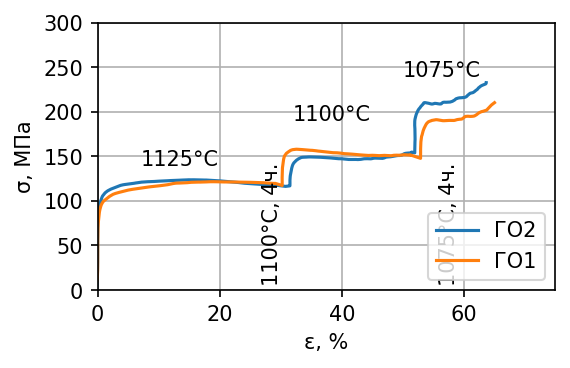

In [290]:
from matplotlib.pyplot import figure
import matplotlib.pylab as pylab
cm = 1/2.54
figure(figsize=(10*cm, 6*cm), dpi=150)

params = {'font.family' : "Times New Roman"}
pylab.rcParams.update(params)

plt.plot(df13['ε'], df13['σ'], label='ГО2')
plt.plot(df14['ε'], df14['σ'], label='ГО1')
plt.grid()
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.text(7,140, '1125°C')
plt.text(32,190, '1100°C')
plt.text(50,240, '1075°C')
plt.text(27,10, '1100°C, 4ч.', rotation = 'vertical')
plt.text(56,10, '1075°C, 4ч.', rotation = 'vertical')
plt.legend(loc='lower right')
plt.ylim(0,300)
plt.xlim(0,75)

In [174]:
df1 = csv_import('./Zainullin/ek79 (GO 1100 8ч, 1075 4ч) т1075С.csv')
df1.head()

,time,N,mm
0,2022-01-17 10:28:35,92,-0.06
1,2022-01-17 10:28:36,92,-0.06
2,2022-01-17 10:28:36,86,-0.05
3,2022-01-17 10:28:37,155,-0.05
4,2022-01-17 10:28:37,327,-0.05


[]

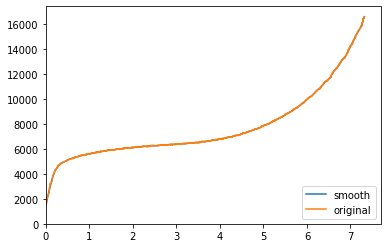

In [175]:
df1['N_f'] = savgol_filter(df1['N'], 55, 5)
df1['mm_f'] = savgol_filter(df1['mm'], 55, 5)
plt.plot(df1['mm_f'], df1['N_f'], label='smooth')
plt.plot(df1['mm'], df1['N'], label='original')
plt.xlim(0,)
plt.ylim(0,)
plt.legend(loc='lower right')
plt.plot()

14445.230559696705


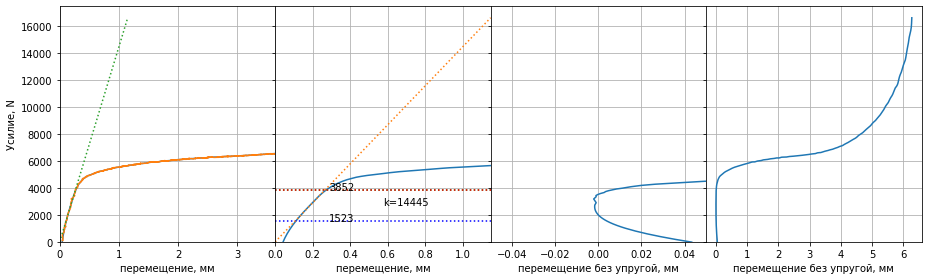

In [176]:
dfalign(df1,15,41)

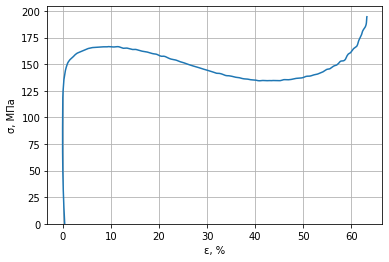

In [177]:
sp1={}
sp1['h0'] = 9.92
sp1['d0'] = 6.32
df1['h'] = sp1['h0']-df1['dx']
df1['area'] = math.pi*0.25*sp1['d0']*sp1['d0']*sp1['h0']/df1['h']
df1['σ'] = df1['N_f']/df1['area']
df1['ε'] = 100*df1['dx']/sp1['h0']
plt.plot(df1['ε'], df1['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [178]:
df2 = csv_import('./Zainullin/ek79 (GO 1100 8ч, 1075 4ч) т1100С 10-3 68%.csv')
df2.head()

,time,N,mm
0,2022-01-17 11:41:15,191,-0.00
1,2022-01-17 11:41:16,195,-0.00
2,2022-01-17 11:41:16,195,-0.00
3,2022-01-17 11:41:17,198,-0.01
4,2022-01-17 11:41:17,201,-0.00


[]

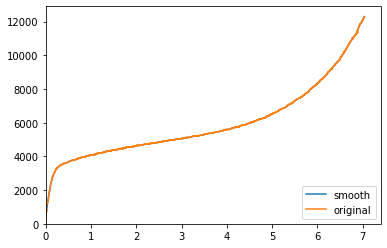

In [179]:
df2['N_f'] = savgol_filter(df2['N'], 55, 5)
df2['mm_f'] = savgol_filter(df2['mm'], 55, 5)
plt.plot(df2['mm_f'], df2['N_f'], label='smooth')
plt.plot(df2['mm'], df2['N'], label='original')
plt.xlim(0,)
plt.ylim(0,)
plt.legend(loc='lower right')
plt.plot()

17927.771104878375


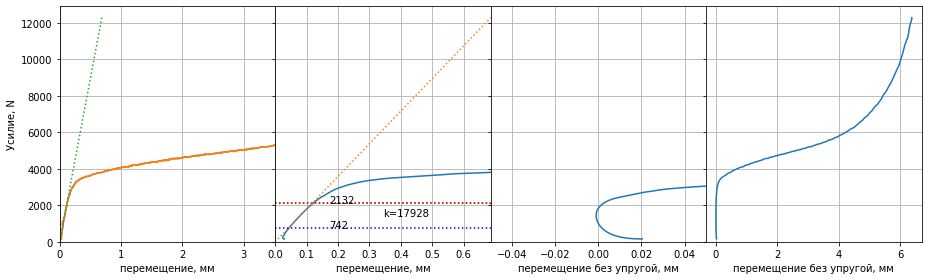

In [180]:
dfalign(df2,10,25)

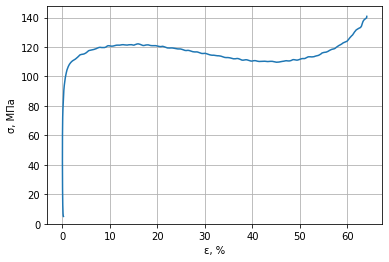

In [181]:
sp2={}
sp2['h0'] = 9.95
sp2['d0'] = 6.32
df2['h'] = sp2['h0']-df2['dx']
df2['area'] = math.pi*0.25*sp2['d0']*sp2['d0']*sp2['h0']/df2['h']
df2['σ'] = df2['N_f']/df2['area']
df2['ε'] = 100*df2['dx']/sp2['h0']
plt.plot(df2['ε'], df2['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [182]:
df3 = csv_import('./Zainullin/ek79 (GO 1100 8ч, 1075 4ч) т1125С 10-3 68%.csv')
df3.head()

,time,N,mm
0,2022-01-17 12:40:38,119,0.01
1,2022-01-17 12:40:39,135,0.01
2,2022-01-17 12:40:40,129,0.01
3,2022-01-17 12:40:40,132,-0.00
4,2022-01-17 12:40:41,142,0.01


[]

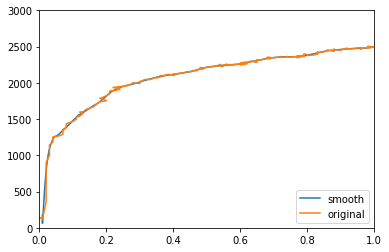

In [183]:
df3['N_f'] = savgol_filter(df3['N'], 25, 5)
df3['mm_f'] = savgol_filter(df3['mm'], 25, 5)
plt.plot(df3['mm_f'], df3['N_f'], label='smooth')
plt.plot(df3['mm'], df3['N'], label='original')
plt.xlim(0,1)
plt.ylim(0,3000)
plt.legend(loc='lower right')
plt.plot()

73777.40507854115


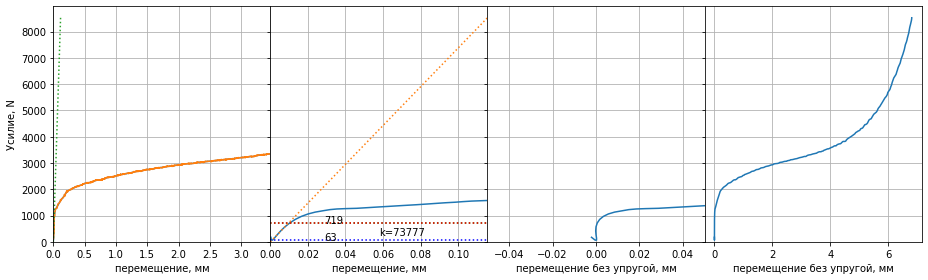

In [184]:
dfalign(df3,1,7)

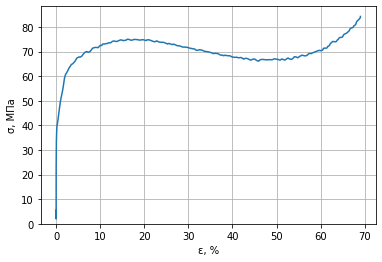

In [185]:
sp3={}
sp3['h0'] = 9.86
sp3['d0'] = 6.32
df3['h'] = sp3['h0']-df3['dx']
df3['area'] = math.pi*0.25*sp3['d0']*sp3['d0']*sp3['h0']/df3['h']
df3['σ'] = df3['N_f']/df3['area']
df3['ε'] = 100*(df3['dx']+sp3['h0']-sp3['h0'])/sp3['h0']
plt.plot(df3['ε'], df3['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [236]:
df4_1 = csv_import('./Zainullin/ek79 (GO 1100 8ч, 1075 4ч) #4 (lдроб1100С 10-3 30%).csv')
df4_1.head()

,time,N,mm
0,2022-01-17 13:39:32,19,0.01
1,2022-01-17 13:39:32,29,0.02
2,2022-01-17 13:39:33,43,0.02
3,2022-01-17 13:39:33,86,0.03
4,2022-01-17 13:39:34,225,0.03


[]

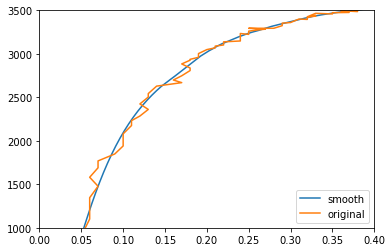

In [237]:
df4_1['N_f'] = savgol_filter(df4_1['N'], 55, 5)
df4_1['mm_f'] = savgol_filter(df4_1['mm'], 55, 5)
plt.plot(df4_1['mm_f'], df4_1['N_f'], label='smooth')
plt.plot(df4_1['mm'], df4_1['N'], label='original')
plt.xlim(0,0.4)
plt.ylim(1000,3500)
plt.legend(loc='lower right')
plt.plot()

30227.8666872959


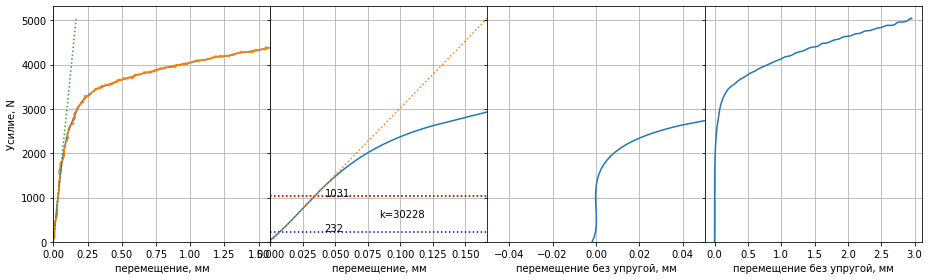

In [238]:
dfalign(df4_1,3,9)

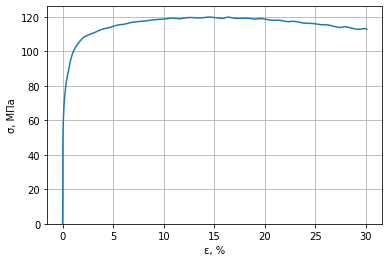

In [239]:
sp4_1={}
sp4_1['h0'] = 9.83
sp4_1['d0'] = 6.31
df4_1['h'] = sp4_1['h0']-df4_1['dx']
df4_1['area'] = math.pi*0.25*sp4_1['d0']*sp4_1['d0']*sp4_1['h0']/df4_1['h']
df4_1['σ'] = df4_1['N_f']/df4_1['area']
df4_1['ε'] = 100*df4_1['dx']/sp4_1['h0']
plt.plot(df4_1['ε'], df4_1['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [240]:
df4_2 = csv_import('./Zainullin/ek79 (GO 1100 8ч, 1075 4ч) #4-2 (lдроб1100С 10-3 30+30%).csv')
df4_2.head()

,time,N,mm
0,2022-01-17 14:48:16,23,0.01
1,2022-01-17 14:48:16,16,0.01
2,2022-01-17 14:48:17,3,0.01
3,2022-01-17 14:48:17,16,0.01
4,2022-01-17 14:48:18,23,-0.00


[]

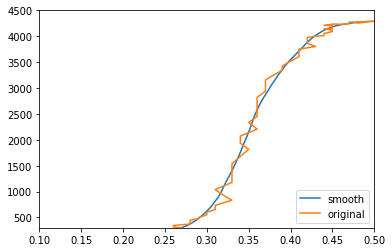

In [241]:
df4_2['N_f'] = savgol_filter(df4_2['N'], 55, 5)
df4_2['mm_f'] = savgol_filter(df4_2['mm'], 55, 5)
plt.plot(df4_2['mm_f'], df4_2['N_f'], label='smooth')
plt.plot(df4_2['mm'], df4_2['N'], label='original')
plt.xlim(0.1,0.5)
plt.ylim(300,4500)
plt.legend(loc='lower right')
plt.plot()

37459.08769461652


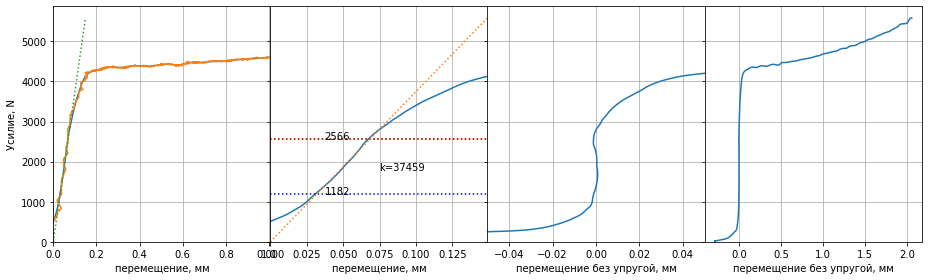

In [242]:
dfalign(df4_2,246,257)

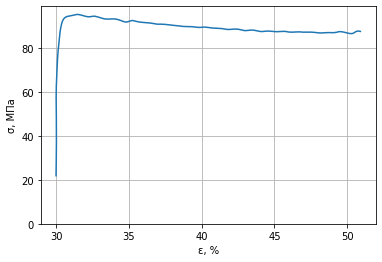

In [243]:
sp4_2={}
sp4_2['h0'] = 6.88
sp4_2['d0'] = 7.54
df4_2['h'] = sp4_2['h0']-df4_2['dx']
df4_2['area'] = math.pi*0.25*sp4_2['d0']*sp4_2['d0']*sp4_2['h0']/df4_2['h']
df4_2['σ'] = df4_2['N_f']/df4_2['area']
df4_2['ε'] = 100*(df4_2['dx']+sp4_1['h0']-sp4_2['h0'])/sp4_1['h0']
df4_2 = df4_2[(df4_2.σ>20)]
plt.plot(df4_2['ε'], df4_2['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [244]:
df4_3 = csv_import('./Zainullin/ek79 (GO 1100 8ч, 1075 4ч) #4-3 (lдроб1100С 10-3 30+30+30%).csv')
df4_3.head()

,time,N,mm
0,2022-01-17 16:08:50,109,0.20
1,2022-01-17 16:08:51,112,0.21
2,2022-01-17 16:08:52,119,0.21
3,2022-01-17 16:08:52,119,0.21
4,2022-01-17 16:08:53,115,0.21


[]

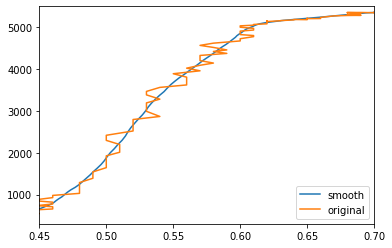

In [245]:
df4_3['N_f'] = savgol_filter(df4_3['N'], 55, 5)
df4_3['mm_f'] = savgol_filter(df4_3['mm'], 55, 5)
plt.plot(df4_3['mm_f'], df4_3['N_f'], label='smooth')
plt.plot(df4_3['mm'], df4_3['N'], label='original')
plt.xlim(0.45,0.7)
plt.ylim(300,5500)
plt.legend(loc='lower right')
plt.plot()

38338.4213716454


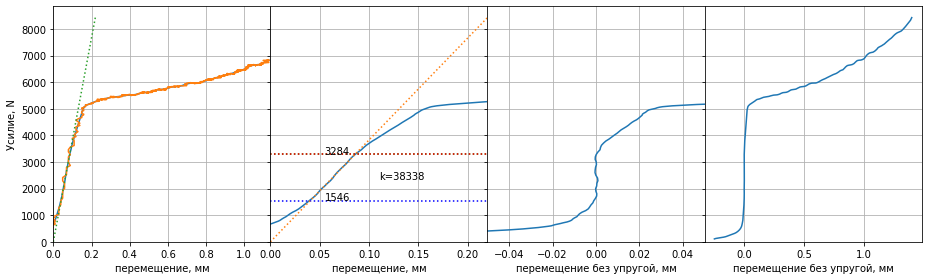

In [246]:
dfalign(df4_3,109,127)

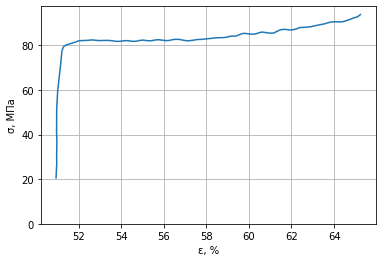

In [247]:
sp4_3={}
sp4_3['h0'] = 4.82
sp4_3['d0'] = 9.01
df4_3['h'] = sp4_3['h0']-df4_3['dx']
df4_3['area'] = math.pi*0.25*sp4_3['d0']*sp4_3['d0']*sp4_3['h0']/df4_3['h']
df4_3['σ'] = df4_3['N_f']/df4_3['area']
df4_3['ε'] = 100*(df4_3['dx']+sp4_1['h0']-sp4_3['h0'])/sp4_1['h0']
df4_3 = df4_3[(df4_3.σ>20)]
plt.plot(df4_3['ε'], df4_3['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [ ]:
maxe4_1=df4_1['ε'].iloc[-1]
#df4_2['ε']+=maxe4_1
maxe4_2=df4_2['ε'].iloc[-1]
#df4_3['ε']+=maxe4_2
df4 = pd.concat([df4_1, df4_2, df4_3])

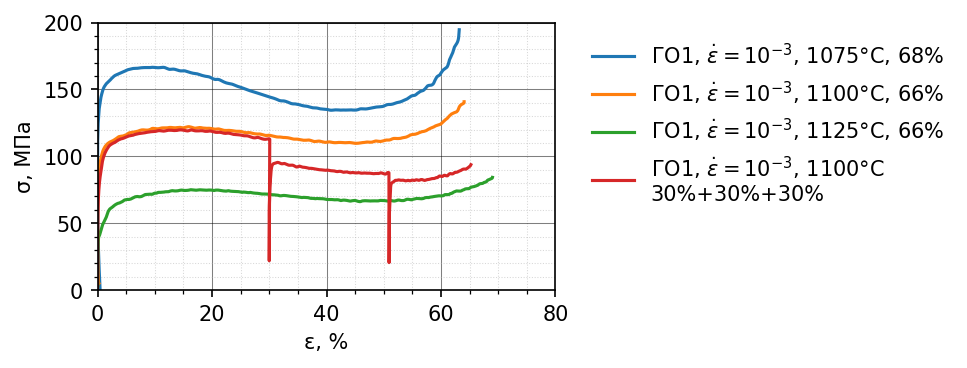

In [301]:
cm = 1/2.54
figure(figsize=(10*cm, 6*cm), dpi=150)
plt.plot(df1['ε'], df1['σ'], label='ГО1, $\.ε=10^{-3}$, 1075°C, 68%')
plt.plot(df2['ε'], df2['σ'], label='ГО1, $\.ε=10^{-3}$, 1100°C, 66%')
plt.plot(df3['ε'], df3['σ'], label='ГО1, $\.ε=10^{-3}$, 1125°C, 66%')
plt.plot(df4['ε'], df4['σ'], label='ГО1, $\.ε=10^{-3}$, 1100°C\n30%+30%+30%')
plt.grid(color='black', alpha=0.5, linewidth=0.5)
plt.grid(which='minor', alpha=0.5, linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.xlim(0,80)
plt.ylim(0,200)
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon=False)

In [172]:
df5_1 = csv_import('./Zainullin/ek79 (GO 1100 8ч, 1075 4ч) #5-1 (lдроб1100С 10-2 30%).csv')
df5_1.head()

,time,N,mm
0,2022-01-17 13:38:00,-6,0.01
1,2022-01-17 13:38:00,391,0.06
2,2022-01-17 13:38:00,1186,0.06
3,2022-01-17 13:38:00,1837,0.06
4,2022-01-17 13:38:01,2506,0.06


Text(0, 0.5, 'σ, МПа')

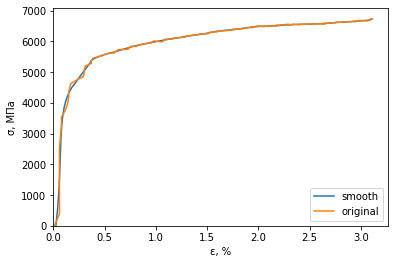

In [250]:
df5_1['N_f'] = savgol_filter(df5_1['N'], 25, 5)
df5_1['mm_f'] = savgol_filter(df5_1['mm'], 25, 5)
plt.plot(df5_1['mm_f'], df5_1['N_f'], label='smooth')
plt.plot(df5_1['mm'], df5_1['N'], label='original')
plt.xlim(0,)
plt.ylim(0,)
plt.legend(loc='lower right')
plt.plot()

86075.48789216435


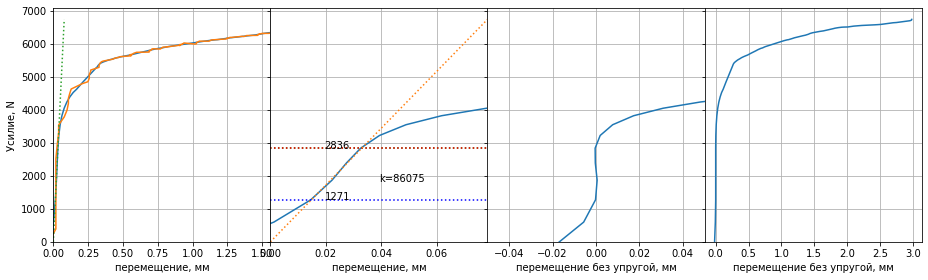

In [61]:
dfalign(df5_1,2,5)

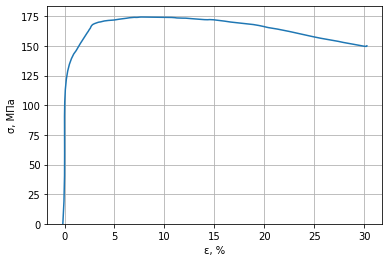

In [62]:
sp5_1={}
sp5_1['h0'] = 9.85
sp5_1['d0'] = 6.31
df5_1['h'] = sp5_1['h0']-df5_1['dx']
df5_1['area'] = math.pi*0.25*sp5_1['d0']*sp5_1['d0']*sp5_1['h0']/df5_1['h']
df5_1['σ'] = df5_1['N_f']/df5_1['area']
df5_1['ε'] = 100*(df5_1['dx']+sp5_1['h0']-sp5_1['h0'])/sp5_1['h0']
plt.plot(df5_1['ε'], df5_1['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [63]:
df6_1 = csv_import('./Zainullin/ek79 (GO 1100 8ч, 1075 4ч) #6-1 (lдроб1100С 510-3 50%).csv')
df6_1.head()

,time,N,mm
0,2022-01-17 13:28:00,433,-0.18
1,2022-01-17 13:28:01,436,-0.18
2,2022-01-17 13:28:01,1167,-0.16
3,2022-01-17 13:28:02,1782,-0.15
4,2022-01-17 13:28:02,2212,-0.12


[]

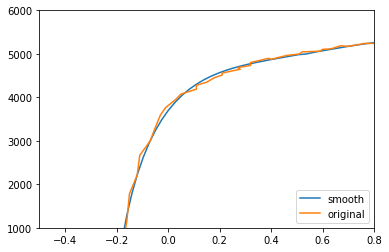

In [64]:
df6_1['N_f'] = savgol_filter(df6_1['N'], 55, 5)
df6_1['mm_f'] = savgol_filter(df6_1['mm'], 55, 5)
plt.plot(df6_1['mm_f'], df6_1['N_f'], label='smooth')
plt.plot(df6_1['mm'], df6_1['N'], label='original')
plt.xlim(-0.5,0.8)
plt.ylim(1000,6000)
plt.legend(loc='lower right')
plt.plot()

30772.32771581733


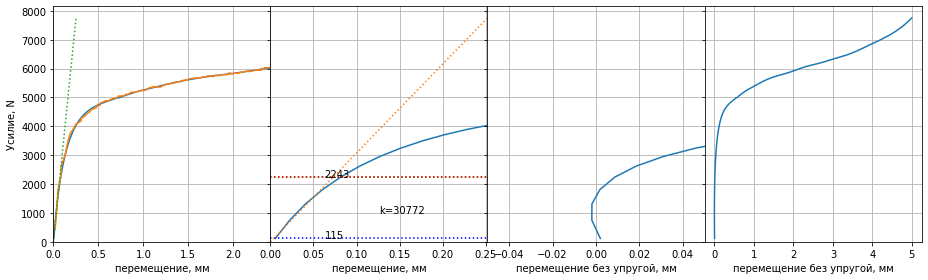

In [65]:
dfalign(df6_1,0,4)

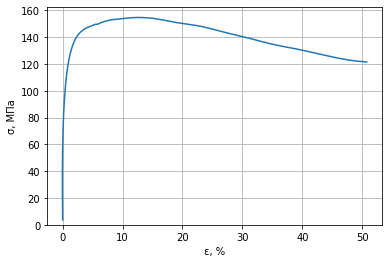

In [66]:
sp6_1={}
sp6_1['h0'] = 9.85
sp6_1['d0'] = 6.33
df6_1['h'] = sp6_1['h0']-df6_1['dx']
df6_1['area'] = math.pi*0.25*sp6_1['d0']*sp6_1['d0']*sp6_1['h0']/df6_1['h']
df6_1['σ'] = df6_1['N_f']/df6_1['area']
df6_1['ε'] = 100*(df6_1['dx']+sp6_1['h0']-sp6_1['h0'])/sp6_1['h0']
plt.plot(df6_1['ε'], df6_1['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [67]:
df7_1 = csv_import('./Zainullin/ek79 (GO2 1150 ) #7-1 (lдроб1100С 510-3 50%).csv')
df7_1.head()

,time,N,mm
0,2022-01-17 14:53:08,29,-0.01
1,2022-01-17 14:53:09,26,-0.01
2,2022-01-17 14:53:10,26,-0.00
3,2022-01-17 14:53:10,36,-0.01
4,2022-01-17 14:53:11,36,-0.01


[]

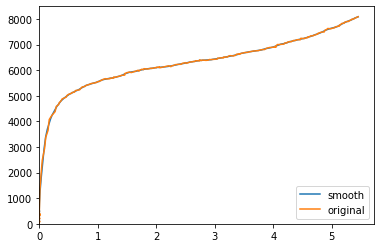

In [68]:
df7_1['N_f'] = savgol_filter(df7_1['N'], 15, 5)
df7_1['mm_f'] = savgol_filter(df7_1['mm'], 15, 5)
plt.plot(df7_1['mm_f'], df7_1['N_f'], label='smooth')
plt.plot(df7_1['mm'], df7_1['N'], label='original')
plt.xlim(0,)
plt.ylim(0,)
plt.legend(loc='lower right')
plt.plot()

22832.54481846023


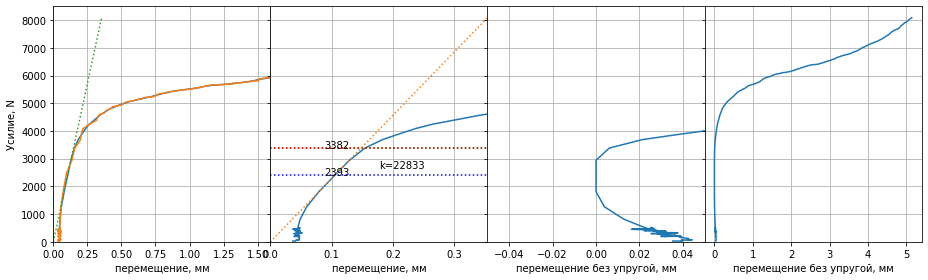

In [69]:
dfalign(df7_1,142,144)

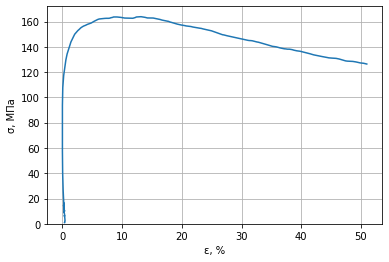

In [70]:
sp7_1={}
sp7_1['h0'] = 10.09
sp7_1['d0'] = 6.32
df7_1['h'] = sp7_1['h0']-df7_1['dx']
df7_1['area'] = math.pi*0.25*sp7_1['d0']*sp7_1['d0']*sp7_1['h0']/df7_1['h']
df7_1['σ'] = df7_1['N_f']/df7_1['area']
df7_1['ε'] = 100*(df7_1['dx']+sp7_1['h0']-sp7_1['h0'])/sp7_1['h0']
plt.plot(df7_1['ε'], df7_1['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [71]:
df7_2 = csv_import('./Zainullin/ek79 (GO2 1150 ) #7-2 (lдроб1100+1075С 510-3 50+50=75%).csv')
df7_2.head()

,time,N,mm
0,2022-01-17 12:44:02,362,-0.05
1,2022-01-17 12:44:02,888,-0.04
2,2022-01-17 12:44:03,1401,-0.03
3,2022-01-17 12:44:03,1888,-0.00
4,2022-01-17 12:44:04,2282,-0.00


[]

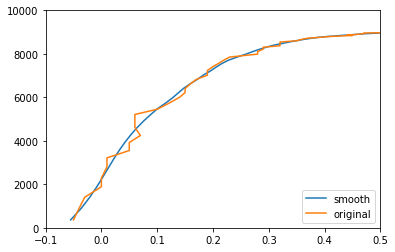

In [72]:
df7_2['N_f'] = savgol_filter(df7_2['N'], 25, 5)
df7_2['mm_f'] = savgol_filter(df7_2['mm'], 25, 5)
plt.plot(df7_2['mm_f'], df7_2['N_f'], label='smooth')
plt.plot(df7_2['mm'], df7_2['N'], label='original')
plt.xlim(-0.1,0.5)
plt.ylim(0,10000)
plt.legend(loc='lower right')
plt.plot()

36083.345037133324


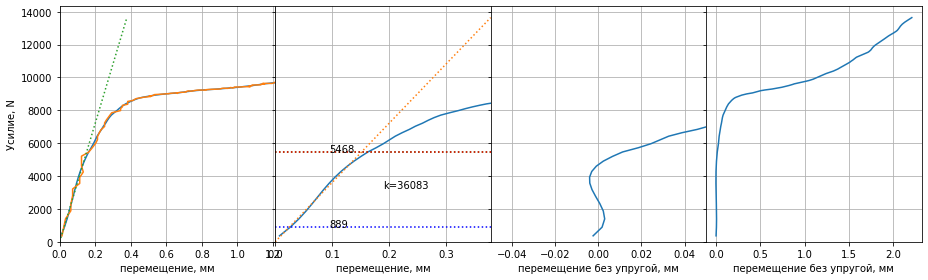

In [73]:
dfalign(df7_2,1,13)

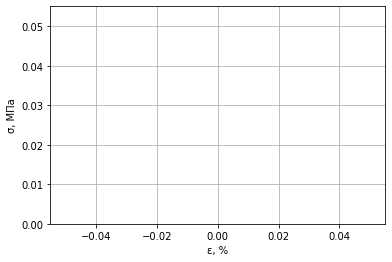

In [74]:
sp7_2={}
sp7_2['h0'] = 0
sp7_2['d0'] = 0
df7_2['h'] = sp7_2['h0']-df7_2['dx']
df7_2['area'] = math.pi*0.25*sp7_2['d0']*sp7_2['d0']*sp7_2['h0']/df7_2['h']
df7_2['σ'] = df7_2['N_f']/df7_2['area']
df7_2['ε'] = 100*(df7_2['dx']+sp7_2['h0']-sp7_2['h0'])/sp7_2['h0']
plt.plot(df7_2['ε'], df7_2['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [75]:
#8

In [76]:
df9 = csv_import('./Zainullin/ek79 (GO2 1150 ) #9 (однократная 1100 510-3 71%).csv')
df9.head()

,time,N,mm
0,2022-01-17 13:14:19,13,0.02
1,2022-01-17 13:14:20,16,0.02
2,2022-01-17 13:14:20,16,0.03
3,2022-01-17 13:14:21,481,0.03
4,2022-01-17 13:14:21,1548,0.07


[]

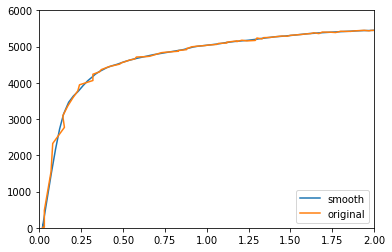

In [77]:
df9['N_f'] = savgol_filter(df9['N'], 15, 5)
df9['mm_f'] = savgol_filter(df9['mm'], 15, 5)
plt.plot(df9['mm_f'], df9['N_f'], label='smooth')
plt.plot(df9['mm'], df9['N'], label='original')
plt.xlim(0,2)
plt.ylim(0,6000)
plt.legend(loc='lower right')
plt.plot()

29056.682532436334


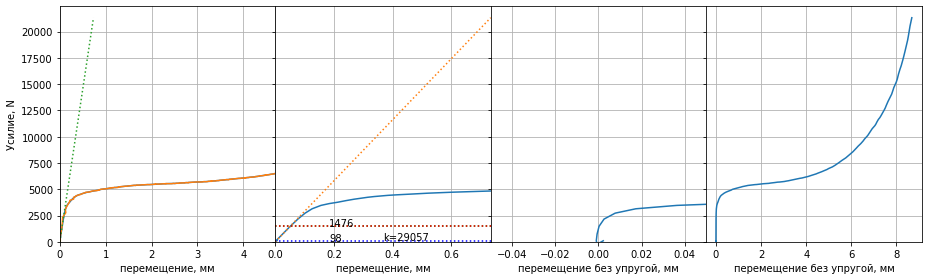

In [78]:
dfalign(df9,0,4)

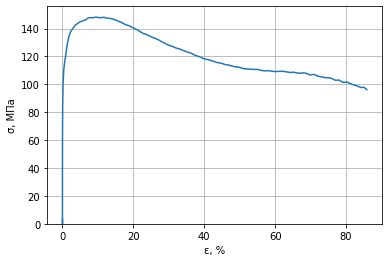

In [79]:
sp9={}
sp9['h0'] = 10.11
sp9['d0'] = 6.32
df9['h'] = sp9['h0']-df9['dx'] #h0-dx
df9['area'] = math.pi*0.25*sp9['d0']*sp9['d0']*sp9['h0']/df9['h']
df9['σ'] = df9['N_f']/df9['area']
df9['ε'] = 100*df9['dx']/sp9['h0']
plt.plot(df9['ε'], df9['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [80]:
df10 = csv_import('./Zainullin/ek79 (GO2 1150 ) #10 (однократная 1125 510-3 74%).csv')
df10.head()

,time,N,mm
0,2022-01-17 14:17:14,3,0.03
1,2022-01-17 14:17:14,-13,0.07
2,2022-01-17 14:17:15,567,0.08
3,2022-01-17 14:17:15,1516,0.12
4,2022-01-17 14:17:16,2160,0.12


[]

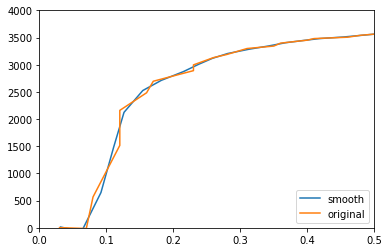

In [81]:
df10['N_f'] = savgol_filter(df10['N'], 9, 5)
df10['mm_f'] = savgol_filter(df10['mm'], 9, 5)
plt.plot(df10['mm_f'], df10['N_f'], label='smooth')
plt.plot(df10['mm'], df10['N'], label='original')
plt.xlim(0,0.5)
plt.ylim(0,4000)
plt.legend(loc='lower right')
plt.plot()

44003.69003689993


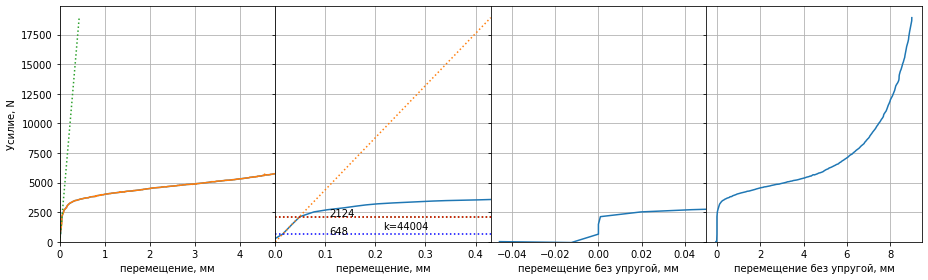

In [82]:
dfalign(df10,2,4)

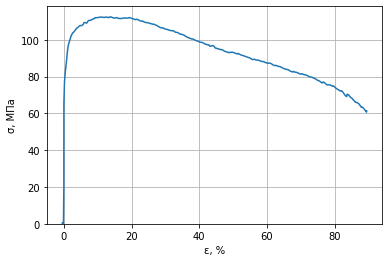

In [83]:
sp10={}
sp10['h0'] = 10.07
sp10['d0'] = 6.45
df10['h'] = sp10['h0']-df10['dx']
df10['area'] = math.pi*0.25*sp10['d0']*sp10['d0']*sp10['h0']/df10['h']
df10['σ'] = df10['N_f']/df10['area']
df10['ε'] = 100*df10['dx']/sp10['h0']
plt.plot(df10['ε'], df10['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [84]:
df11 = csv_import('./Zainullin/ek79 (GO2 1150 ) #11 (однократная 1075 510-3 72%).csv')
df11.head()

,time,N,mm
0,2022-01-17 15:30:27,13,0.01
1,2022-01-17 15:30:27,10,0.02
2,2022-01-17 15:30:28,654,0.06
3,2022-01-17 15:30:28,1535,0.08
4,2022-01-17 15:30:29,2359,0.12


[]

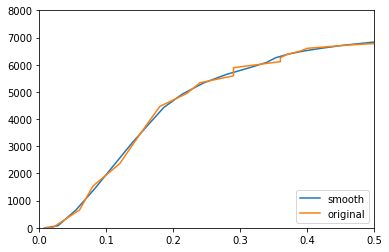

In [85]:
df11['N_f'] = savgol_filter(df11['N'], 13, 5)
df11['mm_f'] = savgol_filter(df11['mm'], 13, 5)
plt.plot(df11['mm_f'], df11['N_f'], label='smooth')
plt.plot(df11['mm'], df11['N'], label='original')
plt.xlim(0,0.5)
plt.ylim(0,8000)
plt.legend(loc='lower right')
plt.plot()

30295.273264401418


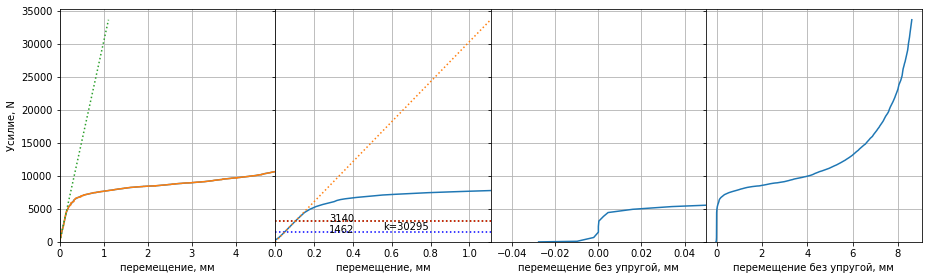

In [86]:
dfalign(df11,3,5)

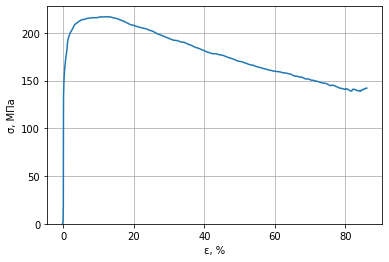

In [87]:
sp11={}
sp11['h0'] = 10
sp11['d0'] = 6.47
df11['h'] = sp11['h0']-df11['dx']
df11['area'] = math.pi*0.25*sp11['d0']*sp11['d0']*sp11['h0']/df11['h']
df11['σ'] = df11['N_f']/df11['area']
df11['ε'] = 100*df11['dx']/sp11['h0']
plt.plot(df11['ε'], df11['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [88]:
df12_1 = csv_import('./Zainullin/ek79 (GO2 1150 ) #12 (дробная 1125 510-3 50%).csv')
df12_1.head()

,time,N,mm
0,2022-01-17 16:29:51,-64,-0.11
1,2022-01-17 16:29:52,179,-0.10
2,2022-01-17 16:29:52,567,-0.08
3,2022-01-17 16:29:53,875,-0.03
4,2022-01-17 16:29:53,1244,-0.03


[]

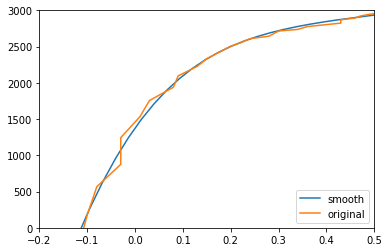

In [89]:
df12_1['N_f'] = savgol_filter(df12_1['N'], 53, 5)
df12_1['mm_f'] = savgol_filter(df12_1['mm'], 53, 5)
plt.plot(df12_1['mm_f'], df12_1['N_f'], label='smooth')
plt.plot(df12_1['mm'], df12_1['N'], label='original')
plt.xlim(-0.2,0.5)
plt.ylim(0,3000)
plt.legend(loc='lower right')
plt.plot()

15166.858677656128


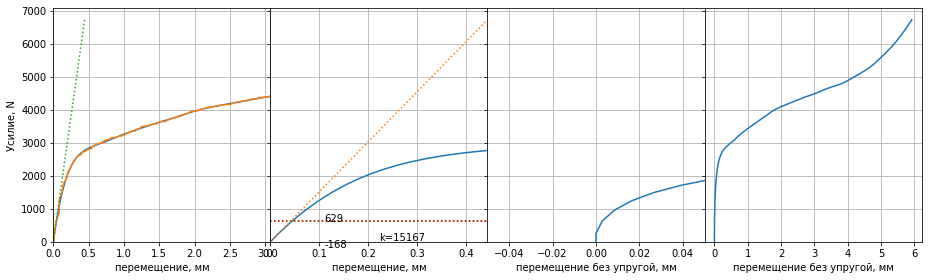

In [90]:
dfalign(df12_1,0,2)

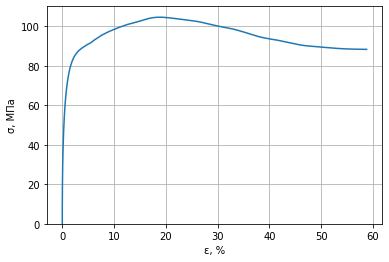

In [91]:
sp12_1={}
sp12_1['h0'] = 10.07
sp12_1['d0'] = 6.32
df12_1['h'] = sp12_1['h0']-df12_1['dx']
df12_1['area'] = math.pi*0.25*sp12_1['d0']*sp12_1['d0']*sp12_1['h0']/df12_1['h']
df12_1['σ'] = df12_1['N_f']/df12_1['area']
df12_1['ε'] = 100*df12_1['dx']/sp12_1['h0']
plt.plot(df12_1['ε'], df12_1['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

In [92]:
df12_2 = csv_import('./Zainullin/ek79 (GO2 1150 ) #12-2 (дроб 1125-1100 510-3 72%).csv')
df12_2.head()

,time,N,mm
0,2022-01-17 13:39:59,353,4.29
1,2022-01-17 13:39:59,362,4.29
2,2022-01-17 13:40:00,853,4.32
3,2022-01-17 13:40:00,1103,4.30
4,2022-01-17 13:40:01,1202,4.31


[]

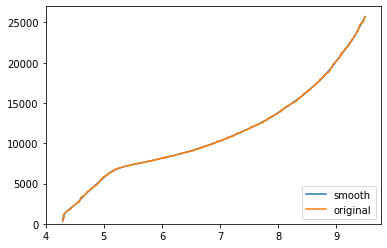

In [93]:
df12_2['N_f'] = savgol_filter(df12_2['N'], 53, 5)
df12_2['mm_f'] = savgol_filter(df12_2['mm'], 53, 5)
plt.plot(df12_2['mm_f'], df12_2['N_f'], label='smooth')
plt.plot(df12_2['mm'], df12_2['N'], label='original')
plt.xlim(4,)
plt.ylim(0,)
plt.legend(loc='lower right')
plt.plot()

49683.34248930594


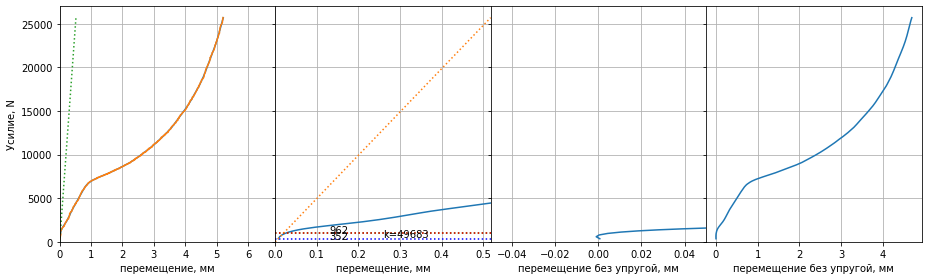

In [94]:
dfalign(df12_2,0,3)

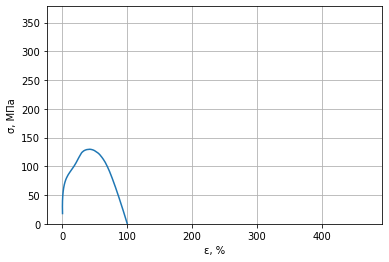

In [95]:
sp12_2={}
sp12_2['h0'] = 1
sp12_2['d0'] = 5
df12_2['h'] = sp12_2['h0']-df12_2['dx']
df12_2['area'] = math.pi*0.25*sp12_2['d0']*sp12_2['d0']*sp12_2['h0']/df12_2['h']
df12_2['σ'] = df12_2['N_f']/df12_2['area']
df12_2['ε'] = 100*df12_2['dx']/sp12_2['h0']
plt.plot(df12_2['ε'], df12_2['σ'])
plt.xlabel('ε, %')
plt.ylabel('σ, МПа')
plt.ylim(0,)
plt.grid()

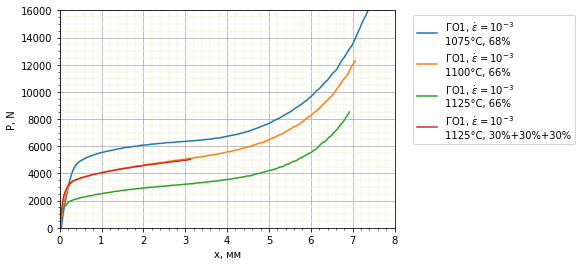

In [262]:
plt.plot(df1['mm_f'], df1['N_f'], label='ГО1, $\.ε=10^{-3}$\n1075°C, 68%')
plt.plot(df2['mm_f'], df2['N_f'], label='ГО1, $\.ε=10^{-3}$\n1100°C, 66%')
plt.plot(df3['mm_f'], df3['N_f'], label='ГО1, $\.ε=10^{-3}$\n1125°C, 66%')
plt.plot(df4_1['mm_f'], df4_1['N_f'], label='ГО1, $\.ε=10^{-3}$\n1125°C, 30%+30%+30%')
plt.xlabel('x, мм')
plt.ylabel('P, N')
plt.xlim(0,8)
plt.ylim(0,16000)
plt.grid()
plt.grid(which='minor', color='beige', alpha=0.5, linestyle='-', linewidth=2)
plt.minorticks_on()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")